In [1]:
import pandas as pd
import networkx as nx
import numpy as np

In [2]:
users = pd.read_csv('users.csv', index_col=0)
edges = pd.read_csv('edges.csv', index_col=0).rename(columns={'user_id_1':'source', 'user_id_2':'target'})

In [3]:
G = nx.from_pandas_edgelist(edges)

In [4]:
adjacency = np.array(nx.adjacency_matrix(G).todense())
pos = nx.layout.fruchterman_reingold_layout(G)

In [5]:
gcc_users = list(nx.connected_components(G))[0]

edges = edges[edges['source'].isin(gcc_users)]
users = users[users['User id'].isin(gcc_users)]

In [6]:
G = nx.from_pandas_edgelist(edges)

In [7]:
pos = nx.layout.fruchterman_reingold_layout(G)

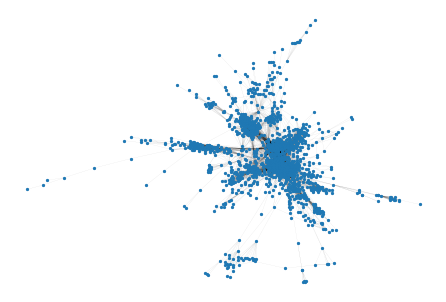

In [8]:
nx.draw(G, pos=pos, node_size=5, width=0.025)

# From original students

check that everyone still have their friends in the joint network

In [9]:
friends = [
    '/home/anvar/iitp-networks-hw2/iitpnetworks2022hw2/freinds_list.csv',
    '/home/anvar/iitp-networks-hw2/iitpnetworks2022hw2(3)/DataFrame.csv',
    '/home/anvar/iitp-networks-hw2/iitpnetworksha2/vertices.csv',
    '/home/anvar/iitp-networks-hw2/iitpnetworks2022hw2(4)/df_friends.csv',
    '/home/anvar/iitp-networks-hw2/iitpnetworks2022hw2(2)/friends_info.csv',
    '/home/anvar/iitp-networks-hw2/iitpnetworksha2(1)/info.csv',
    '/home/anvar/iitp-networks-hw2/iitpnetworksha1/friends.csv'
]

dfs = []
for f in friends:
    df = pd.read_csv(f)
    if 'id' in df.columns:
        df.rename(columns={'id':'User id',
                           'first_name':'Name', 
                           'sex': 'Sex', 
                          'bdate':'Birthday',
                          'city':'City',
                          'last_name':'Surname',
                          'university_name':'University'}, inplace=True)
    try:
        df = df[['Birthday', 'City', 'Name', 'Sex', 'University', 'User id']]
    except KeyError:
        df = df[['Birthday', 'Name', 'Sex', 'User id']]
#     print(sorted(list(df.columns)))
    dfs.append(df)

In [10]:
for d in dfs:
    print(d.shape[0], d[d['User id'].isin(gcc_users)].shape[0])

304 283
357 298
503 394
141 129
218 214
50 48
536 531
